# Функция Стыбинского-Танга

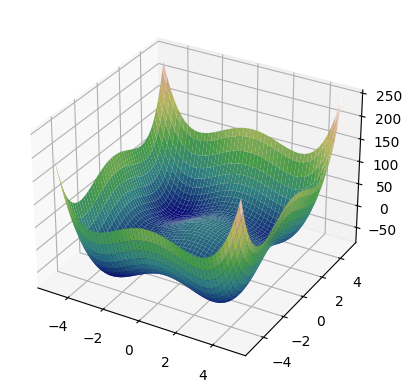

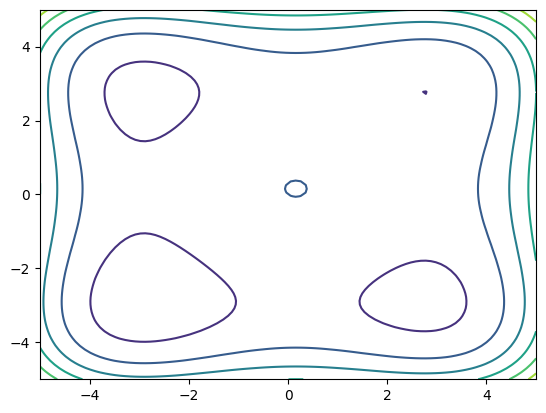

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


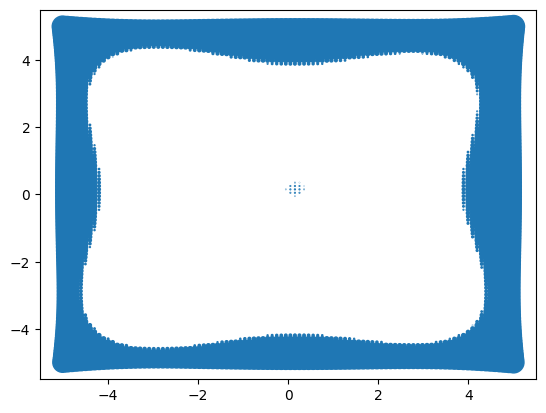

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def styblinski_tang(x):
  x1, x2 = x
  return 0.5 * ((x1**4 + x2**4) - 16 * (x1**2 + x2**2)+ 5 * (x1 + x2))

def styblinski_tang_2d_wrapper(x1, x2):
  return styblinski_tang([x1, x2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.array([styblinski_tang_2d_wrapper(xi, yi) for xi, yi in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

surface = ax.plot_surface(X, Y, Z, cmap='gist_earth')
plt.show()
plt.contour(X,Y,Z)
plt.show()
plt.scatter(X, Y, Z)
plt.show()

In [ ]:
!pip install scipy
!pip install geneticalgorithm
from scipy import optimize as opt
from geneticalgorithm import geneticalgorithm as ga

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=9c0431b26b7802f5a3bcdf9d63d617a90dd5d6436cf18c26b8b9e0a9383facad
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


# Классический алгоритм оптимизации (Ньютона)

In [ ]:
import time

# Параметры для алгоритма Ньютона
initial_guess = [1.0, 1.0]

newton_results = []

def jac_styblinski_tang(x):
  n = len(x)
  grad = 4 * x**3 - 32 * x + 5
  return grad

time_start = time.time()

for _ in range(100):
  res = opt.minimize(styblinski_tang, initial_guess, method='Newton-CG', jac=jac_styblinski_tang)
  newton_results.append(res.fun)

time_end_N = time.time()-time_start

# Эволюционный алгоритм оптимизации

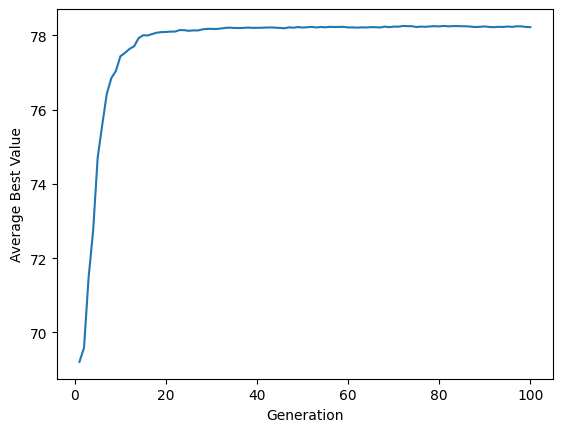

In [ ]:
import time

# Параметры для эволюционного алгоритма
population_size = 50
max_generations = 100
mutation_rate = 0.2
crossover_rate = 0.8

def evolutionary_optimization():
  # 1. Инициализация
  population = np.random.uniform(-5, 5, (population_size, 2))

  # Лучшие значения для каждого поколения
  best_values_per_generation = []

  for generation in range(max_generations):
    # 2. Оценка
    fitness_values = [-styblinski_tang(ind) for ind in population]

    # Коррекция фитнеса
    offset = min(fitness_values)
    fitness_values = [fv - offset for fv in fitness_values]

    # Нормализация вероятностей
    p = fitness_values / np.sum(fitness_values)

    # Сохрание лучшего значения для текущего поколения
    best_individual = population[np.argmax(fitness_values)]
    best_values_per_generation.append(-styblinski_tang(best_individual))

    # 3. Селекция
    selected = np.random.choice(population_size, size=population_size, p=p)

    # 4. Скрещивание
    children = []
    for i in range(0, population_size, 2):
      parent1, parent2 = population[selected[i]], population[selected[i+1]]
      child1, child2 = parent1.copy(), parent2.copy()
      if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(2)
        child1[:crossover_point], child2[:crossover_point] = parent2[:crossover_point], parent1[:crossover_point]
      children.extend((child1, child2))

    # 5. Мутация
    for child in children:
      if np.random.rand() < mutation_rate:
        mutation_point = np.random.randint(2)
        child[mutation_point] += np.random.uniform(-1, 1)

    # 6. Замена
    population = np.array(children)

  return best_individual, best_values_per_generation

evolutionary_final_results = []
all_generational_best_values = []

time_start = time.time()

for _ in range(100):
  best, best_values_per_generation = evolutionary_optimization()
  evolutionary_final_results.append(styblinski_tang(best))
  all_generational_best_values.append(best_values_per_generation)

time_end_E = time.time()-time_start

# Визуализация результатов
generations = list(range(1, max_generations + 1))
avg_best_values = np.mean(all_generational_best_values, axis=0)
plt.plot(generations, avg_best_values)
plt.xlabel('Generation')
plt.ylabel('Average Best Value')
plt.show()

# Анализ результатов

In [ ]:
newton_results = [x for x in newton_results if np.isfinite(x)]
evolutionary_results = [x for x in evolutionary_final_results if np.isfinite(x)]

print(newton_results[-3:])
print(evolutionary_results[-3:])

newton_mean = np.mean(newton_results)
newton_variance = np.var(newton_results)
evolutionary_mean = np.mean(evolutionary_results)
evolutionary_variance = np.var(evolutionary_results)

data = {
  'Algorithm': ['Newton', 'Evolutionary'],
  'Mean': [newton_mean, evolutionary_mean],
  'Variance': [newton_variance, evolutionary_variance],
  'Time': [time_end_N, time_end_E]
}

df = pd.DataFrame(data)
df

[-50.05889331056788, -50.05889331056788, -50.05889331056788]
[-77.90528925860461, -78.18378900083547, -77.66888690975668]


,Algorithm,Mean,Variance,Time
0,Newton,-50.058893,4.543839e-28,3.645497
1,Evolutionary,-78.219975,2.037954e-02,8.924222


In [ ]:
!pip install sklearn-genetic-opt

# RF-классификатор

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.767592	0.0918792  	0.897983   	0.599276   
1  	20    	0.854538	0.0500508  	0.912828   	0.762611   
2  	19    	0.895932	0.0199525  	0.925822   	0.860935   
3  	19    	0.916517	0.0133251  	0.929557   	0.883168   
4  	16    	0.925066	0.00336161 	0.929557   	0.920226   
5  	18    	0.927097	0.00406708 	0.93503    	0.923867   
6  	13    	0.927834	0.00442983 	0.93503    	0.922057   
7  	18    	0.926737	0.00493085 	0.931378   	0.918384   
8  	19    	0.924689	0.00711182 	0.931378   	0.912735   
9  	19    	0.927848	0.00280115 	0.931378   	0.923919   
10 	19    	0.929697	0.00240317 	0.931388   	0.923991   
11 	17    	0.930252	0.00125289 	0.931388   	0.927571   
12 	18    	0.930074	0.00220345 	0.931388   	0.92396    
13 	18    	0.929138	0.00273555 	0.931388   	0.922098   
14 	17    	0.931738	0.00232551 	0.936944   	0.927612   
15 	20    	0.931366	0.00262487 	0.933199   	0.923919   
16 	17    	0.931753	0.000723164	0.933199   	0.93

0.9340222575516693

In [ ]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.010917025981390636,
 'bootstrap': True,
 'max_depth': 12,
 'max_leaf_nodes': 25,
 'n_estimators': 196}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


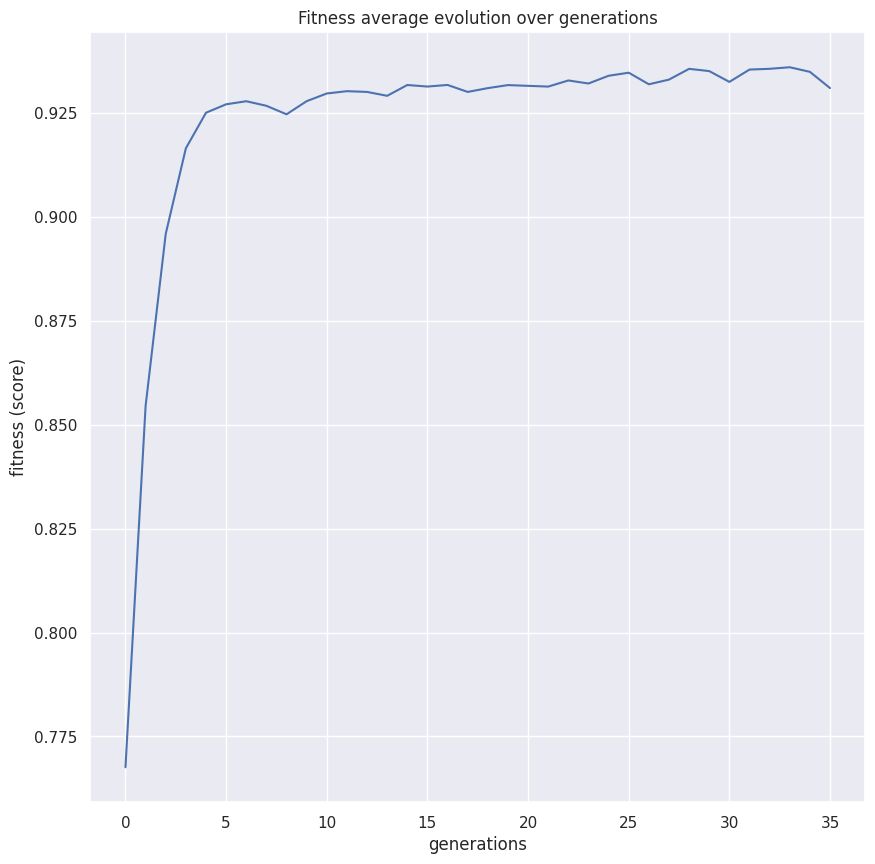

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# SVM-классификатор

In [ ]:
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from random import randint
import scipy.stats as sts
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
              'C': Integer(1,10)}
model=SVC()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.944526	0.0556128  	0.98145    	0.833044   
1  	19    	0.964935	0.0295978  	0.98145    	0.877581   
2  	16    	0.977733	0.00220166 	0.98145    	0.974012   
3  	18    	0.978662	0.00291185 	0.983323   	0.975854   
4  	18    	0.980154	0.00275647 	0.983323   	0.975885   
5  	18    	0.979964	0.00260296 	0.983302   	0.974002   
6  	18    	0.981635	0.0019335  	0.983302   	0.977757   
7  	18    	0.982745	0.00248404 	0.985133   	0.975905   
8  	19    	0.981456	0.00350547 	0.988848   	0.975905   
9  	18    	0.983489	0.00225956 	0.988848   	0.979599   
10 	20    	0.982932	0.00395303 	0.988848   	0.974043   
11 	17    	0.982554	0.00407373 	0.988848   	0.974043   
12 	19    	0.98293 	0.00359228 	0.988848   	0.975885   
13 	19    	0.983311	0.00331387 	0.988848   	0.977747   
14 	17    	0.983119	0.00383473 	0.988848   	0.977747   
15 	19    	0.982008	0.00310269 	0.988848   	0.977747   
16 	19    	0.981636	0.00255192 	0.985175   	0.97

0.9896661367249603

In [ ]:
evolved_estimator.best_params_

{'kernel': 'rbf', 'C': 4}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


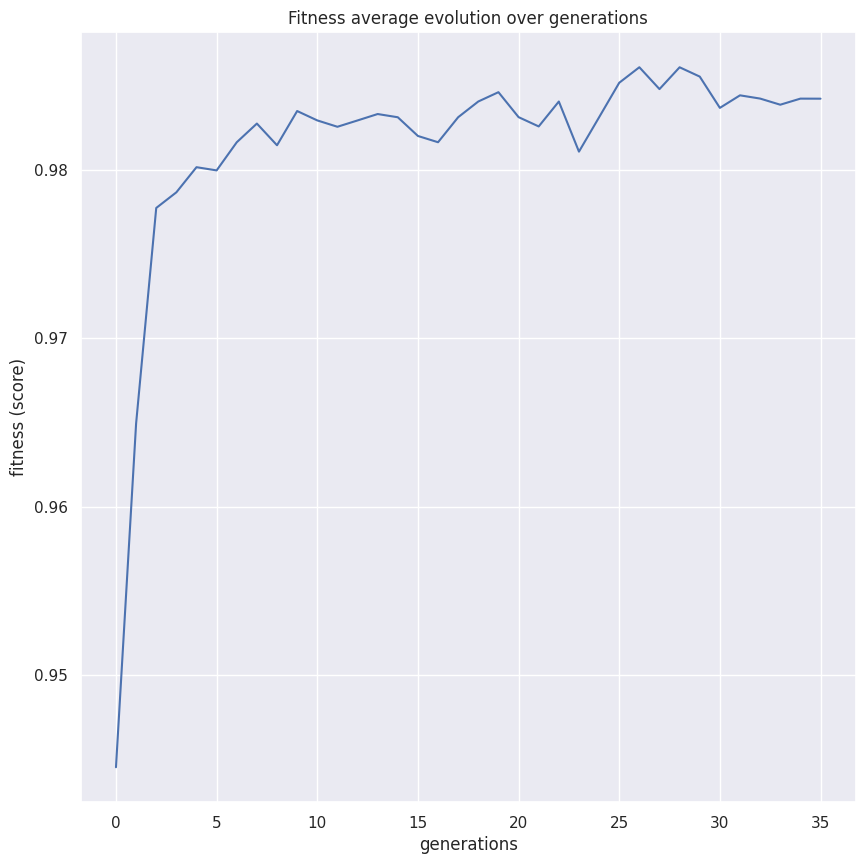

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# K-means-классификатор

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
parameters = {'n_neighbors': Integer(3,10),
              'leaf_size': Integer(3,50)}
model=KNeighborsClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.949914	0.00900991 	0.962901   	0.93324    
1  	17    	0.959744	0.00524491 	0.966594   	0.949928   
2  	16    	0.967352	0.00290373 	0.97035    	0.961039   
3  	17    	0.96921 	0.00148313 	0.97035    	0.966615   
4  	17    	0.970876	0.00167069 	0.974033   	0.968467   
5  	19    	0.969385	0.00291748 	0.974033   	0.96287    
6  	20    	0.968467	0.00505282 	0.974033   	0.955452   
7  	16    	0.969586	0.00300651 	0.974033   	0.964784   
8  	18    	0.96903 	0.00497133 	0.975874   	0.96107    
9  	18    	0.967545	0.00498437 	0.975874   	0.961049   
10 	19    	0.969383	0.00471352 	0.975874   	0.961018   
11 	18    	0.96883 	0.00307741 	0.974033   	0.961059   
12 	20    	0.968646	0.00383692 	0.974033   	0.96107    
13 	16    	0.969757	0.00311122 	0.977747   	0.966574   
14 	17    	0.972543	0.00453477 	0.977747   	0.966594   
15 	19    	0.972357	0.00494528 	0.977747   	0.962901   
16 	16    	0.971994	0.00660784 	0.977747   	0.95

0.9753577106518283

In [ ]:
evolved_estimator.best_params_

{'n_neighbors': 3, 'leaf_size': 10}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


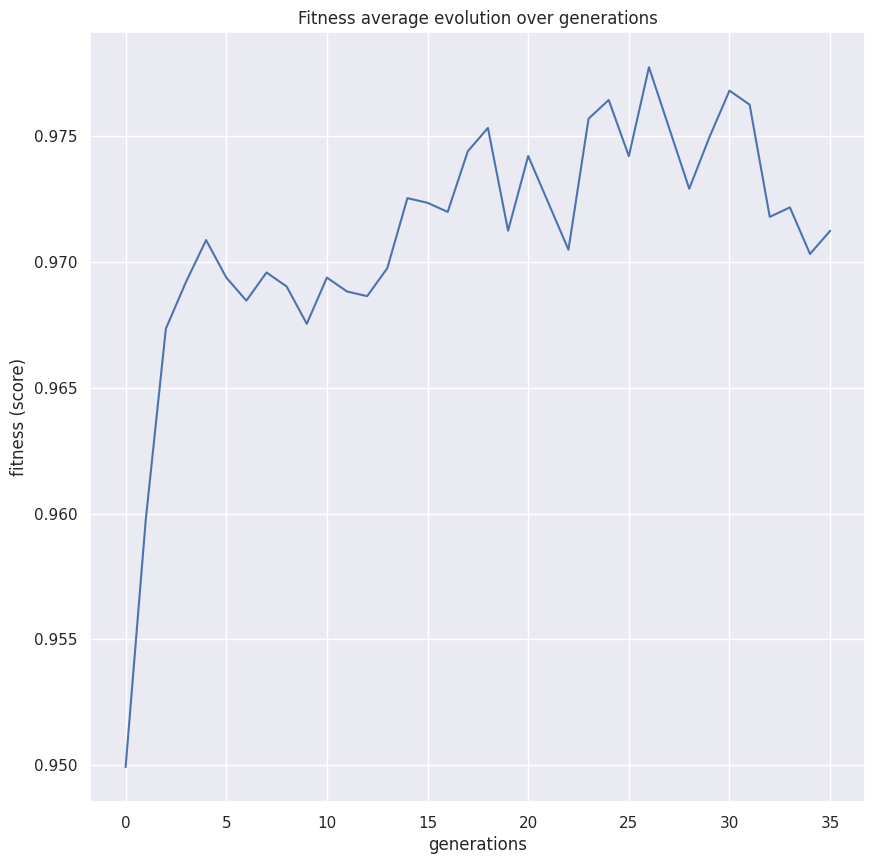

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()